In [5]:
import sys
sys.path.append('../')
from util import indicator, data, display

In [42]:
df = data.get_year_data('NVDA')

[*********************100%%**********************]  1 of 1 completed


In [10]:
df=df.reset_index().reset_index()

In [11]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2023-08-03,43.799999,45.118000,43.799999,44.514999,44.501678,324176000
1,1,2023-08-04,44.985001,45.641998,44.393002,44.680000,44.666626,362666000
2,2,2023-08-07,45.111000,45.540001,44.563000,45.417000,45.403404,322154000
3,3,2023-08-08,44.853001,45.242001,44.056000,44.664001,44.650635,353843000
4,4,2023-08-09,44.273998,44.312000,42.133999,42.554001,42.541264,586449000
...,...,...,...,...,...,...,...,...
247,247,2024-07-29,113.690002,116.279999,111.300003,111.589996,111.589996,248152100
248,248,2024-07-30,111.519997,111.989998,102.540001,103.730003,103.730003,486833300
249,249,2024-07-31,112.900002,118.339996,110.879997,117.019997,117.019997,473174200
250,250,2024-08-01,117.529999,120.160004,106.809998,109.209999,109.209999,523462300


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import matplotlib.dates as mdates

# 한글 폰트 경로 설정 (예: 나눔고딕)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

# 가상의 주식 데이터 생성 (90일 데이터)


C:\Users\kwkim\AppData\Local\Temp\ipykernel_24748\4160197773.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.scatter(volume[0], price[0], color='green', s=100, label='시작')
C:\Users\kwkim\AppData\Local\Temp\ipykernel_24748\4160197773.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.scatter(volume[-1], price[-1], color='red', s=100, label='끝')


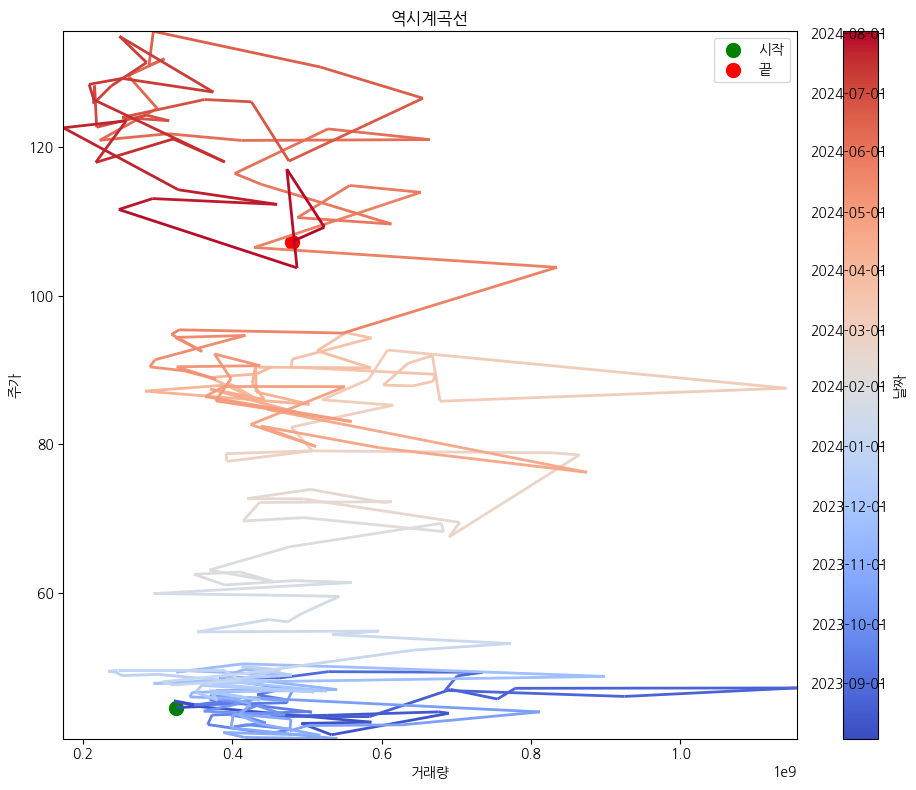

In [48]:
def counterclock(df):
    days = df.index
    price = df['Close']
    volume = df['Volume']
    
    # 역시계곡선 그리기
    fig2, ax3 = plt.subplots(figsize=(10, 8))
    
    points = np.array([volume, price]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    # 시간에 따른 색상 변화를 위한 설정
    cmap = plt.get_cmap('coolwarm')
    norm = plt.Normalize(mdates.date2num(days[0]), mdates.date2num(days[-1]))
    colors = cmap(norm(mdates.date2num(days)))
    
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(mdates.date2num(days))
    lc.set_linewidth(2)
    
    line = ax3.add_collection(lc)
    ax3.set_xlim(volume.min(), volume.max())
    ax3.set_ylim(price.min(), price.max())
    
    ax3.set_xlabel('거래량')
    ax3.set_ylabel('주가')
    ax3.set_title('역시계곡선')
    
    # 컬러바 추가 (10일 간격으로 날짜 표시)
    cbar = fig2.colorbar(line, ax=ax3)
    cbar.set_label('날짜')
    cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    cbar.ax.yaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.setp(cbar.ax.yaxis.get_majorticklabels(), rotation=0, ha='right')
    
    # 시작점과 끝점 표시
    ax3.scatter(volume[0], price[0], color='green', s=100, label='시작')
    ax3.scatter(volume[-1], price[-1], color='red', s=100, label='끝')
    ax3.legend()
    
    plt.tight_layout()
    plt.show()

C:\Users\kwkim\AppData\Local\Temp\ipykernel_24748\2862908383.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.scatter(volume[0], price[0], color='green', s=100, label='시작')
C:\Users\kwkim\AppData\Local\Temp\ipykernel_24748\2862908383.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.scatter(volume[-1], price[-1], color='red', s=100, label='끝')


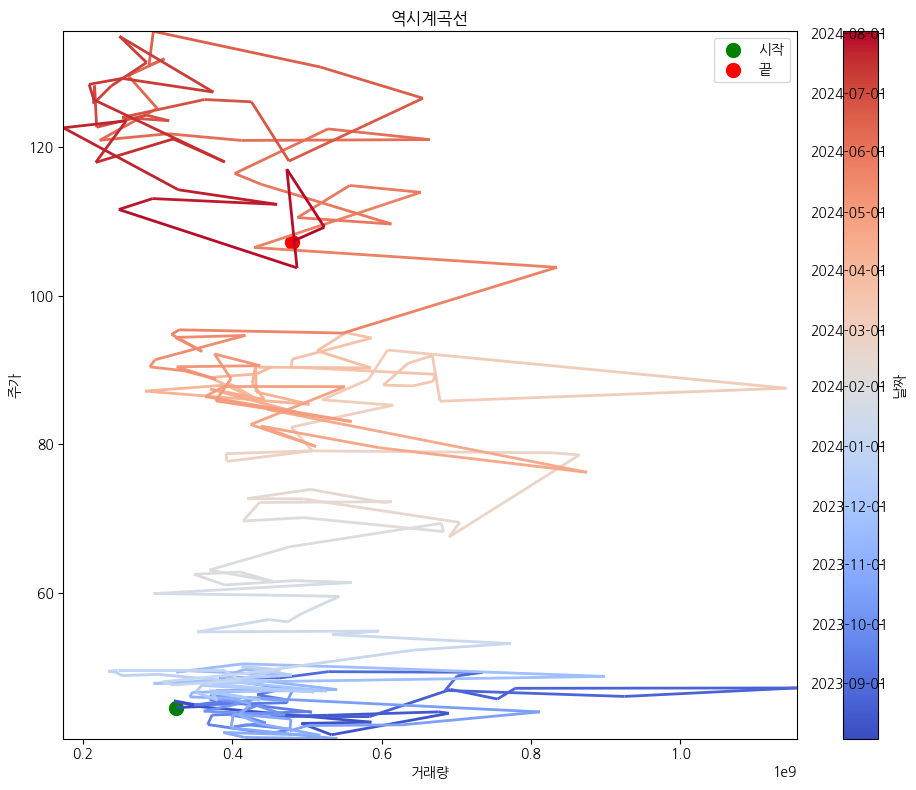

In [49]:
counterclock(df)

In [41]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2023-08-03,43.799999,45.118000,43.799999,44.514999,44.501678,324176000
1,1,2023-08-04,44.985001,45.641998,44.393002,44.680000,44.666626,362666000
2,2,2023-08-07,45.111000,45.540001,44.563000,45.417000,45.403404,322154000
3,3,2023-08-08,44.853001,45.242001,44.056000,44.664001,44.650635,353843000
4,4,2023-08-09,44.273998,44.312000,42.133999,42.554001,42.541264,586449000
...,...,...,...,...,...,...,...,...
247,247,2024-07-29,113.690002,116.279999,111.300003,111.589996,111.589996,248152100
248,248,2024-07-30,111.519997,111.989998,102.540001,103.730003,103.730003,486833300
249,249,2024-07-31,112.900002,118.339996,110.879997,117.019997,117.019997,473174200
250,250,2024-08-01,117.529999,120.160004,106.809998,109.209999,109.209999,523462300
